In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

def normalize(loss_array):
    return np.array(loss_array) / max(loss_array)

In [2]:
angles = [i for i in range(360)]
mse_losses = [((i + 180) % 360 - 180) ** 2 for i in range(360)]
mae_losses = [np.abs((i + 180) % 360 - 180) for i in range(360)]
sin_cos_losses = []
for i in range(360):
    rad = math.radians(i)
    sin = math.sin(rad)
    cos = math.cos(rad)
    loss = sin ** 2 + (1 - cos) ** 2
    sin_cos_losses.append(loss)


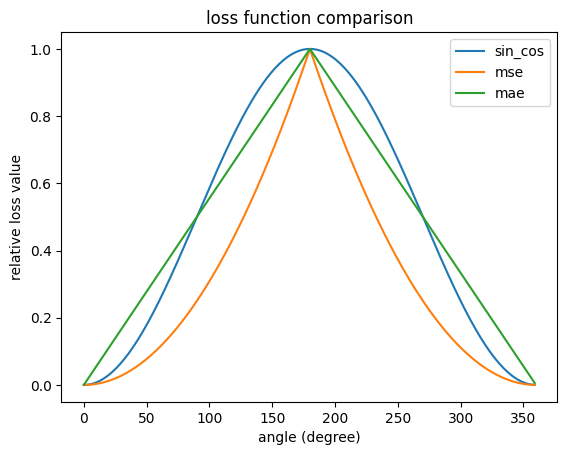

In [8]:
plt.plot(angles, normalize(sin_cos_losses), label='sin_cos')
plt.plot(angles, normalize(mse_losses), label='mse')
plt.plot(angles, normalize(mae_losses), label='mae')

plt.title('loss function comparison')
plt.xlabel('angle (degree)')
plt.ylabel('relative loss value')

plt.legend()
plt.show()

## 誤差の説明について

$\theta_1 - \theta_2$ を $\theta$ とすると、 $loss_{sin,cos}(\theta)$ は、2次元座標$(1, 0)$ と $(cos\theta, sin\theta)$ の二乗距離になる。

$(1 - cos\theta)^2 + sin\theta^2 = 1 + sin^2\theta + cos^2\theta - 2cos\theta = 2(1 - cos\theta)$

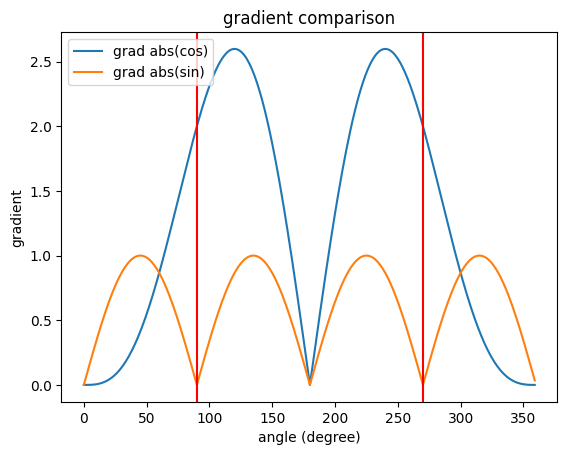

In [27]:
angles = [i for i in range(360)]

grad_cos_list = []
grad_sin_list = []

for i in range(360):
    rad = math.radians(i)
    sin = math.sin(rad)
    cos = math.cos(rad)
    grad_cos = 2 * (1 - cos) * sin
    grad_sin = 2 * sin * cos

    grad_cos_list.append(abs(grad_cos))
    grad_sin_list.append(abs(grad_sin))
plt.plot(angles, grad_cos_list, label='grad abs(cos)')
plt.plot(angles, grad_sin_list, label='grad abs(sin)')


plt.axvline(x=90, color='r')
plt.axvline(x=270, color='r')
plt.title('gradient comparison')
plt.xlabel('angle (degree)')
plt.ylabel('gradient')

plt.legend()
plt.show()

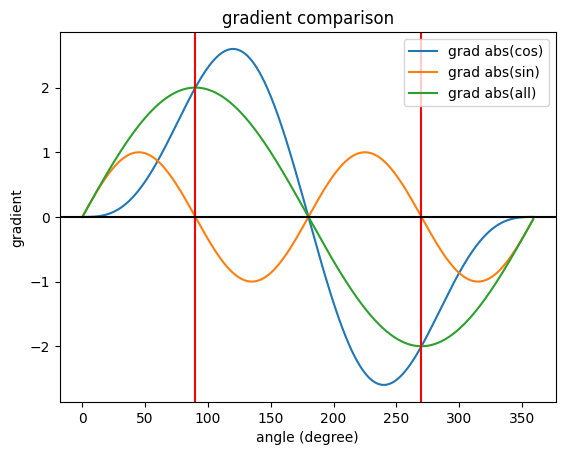

In [31]:
angles = [i for i in range(360)]

grad_cos_list = []
grad_sin_list = []
grad_all_list = []

for i in range(360):
    rad = math.radians(i)
    sin = math.sin(rad)
    cos = math.cos(rad)
    grad_cos = 2 * (1 - cos) * sin
    grad_sin = 2 * sin * cos

    grad_cos_list.append((grad_cos))
    grad_sin_list.append((grad_sin))
    grad_all_list.append(grad_cos + grad_sin)
    
plt.plot(angles, grad_cos_list, label='grad abs(cos)')
plt.plot(angles, grad_sin_list, label='grad abs(sin)')
plt.plot(angles, grad_all_list, label='grad abs(all)')


plt.axvline(x=90, color='r')
plt.axvline(x=270, color='r')
plt.axhline(y=0, color='black')
plt.title('gradient comparison')
plt.xlabel('angle (degree)')
plt.ylabel('gradient')

plt.legend()
plt.show()